<a href="https://colab.research.google.com/github/anirudhkowluri/Data_Sceince_Assignment/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
#1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [97]:
# 2. LOAD DATA

sentiment_df = pd.read_csv("/fear_greed_index.csv")
trades_df = pd.read_csv("/historical_data.csv")

In [98]:
# check the first 5 values
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [99]:
# check the last 5  values
sentiment_df.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [101]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [102]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [103]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [104]:
sentiment_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [105]:
trades_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [106]:
# 3. DATA CLEANING

# Check for missing values
print(sentiment_df.isnull().sum())
print(trades_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [107]:
#EDA
# Convert date columns
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'].dt.date)

print("Date columns converted and new 'date' column created in trades_df with consistent dtype.")

Date columns converted and new 'date' column created in trades_df with consistent dtype.


In [108]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [109]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [110]:
# Feature engineering
daily_trades = trades_df.groupby('date').agg(
    total_volume=('Size Tokens', 'sum'),
    avg_price=('Execution Price', 'mean'),
    net_pnl=('Closed PnL', 'sum'),
    trade_count=('Account', 'count'),
    buy_trades=('Side', lambda x: (x == 'BUY').sum()),
    sell_trades=('Side', lambda x: (x == 'SELL').sum())
).reset_index()

daily_trades['buy_sell_ratio'] = daily_trades['buy_trades'] / (daily_trades['sell_trades'] + 1)

print("Daily trade data aggregated successfully into 'daily_trades' DataFrame.")
print(daily_trades.head())

Daily trade data aggregated successfully into 'daily_trades' DataFrame.
        date  total_volume     avg_price     net_pnl  trade_count  buy_trades  \
0 2023-05-01       0.25130   1898.133333    0.000000            3           3   
1 2023-12-05      11.80901  11038.300000    0.000000            9           7   
2 2023-12-14    4092.28901   8031.868818 -205.434737           11           5   
3 2023-12-15    3558.00000      2.982000  -24.632034            2           2   
4 2023-12-16   39897.00000      0.384707    0.000000            3           3   

   sell_trades  buy_sell_ratio  
0            0        3.000000  
1            2        2.333333  
2            6        0.714286  
3            0        2.000000  
4            0        3.000000  


In [111]:
# merge both datasets
merged_df = pd.merge(daily_trades, sentiment_df, on='date', how='inner')

print("Daily trades and sentiment data merged successfully into 'merged_df' DataFrame.")
print(merged_df.head())

Daily trades and sentiment data merged successfully into 'merged_df' DataFrame.
        date  total_volume     avg_price     net_pnl  trade_count  buy_trades  \
0 2023-05-01       0.25130   1898.133333    0.000000            3           3   
1 2023-12-05      11.80901  11038.300000    0.000000            9           7   
2 2023-12-14    4092.28901   8031.868818 -205.434737           11           5   
3 2023-12-15    3558.00000      2.982000  -24.632034            2           2   
4 2023-12-16   39897.00000      0.384707    0.000000            3           3   

   sell_trades  buy_sell_ratio   timestamp  value classification  
0            0        3.000000  1682919000     63          Greed  
1            2        2.333333  1701754200     75  Extreme Greed  
2            6        0.714286  1702531800     72          Greed  
3            0        2.000000  1702618200     70          Greed  
4            0        3.000000  1702704600     67          Greed  


In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['target_multiclass'] = le.fit_transform(
    merged_df['classification']
)


In [113]:
# FEATURE SELECTION


features = [
    'total_volume',
    'avg_price',
    'net_pnl',
    'buy_trades',
    'sell_trades',
    'trade_count',
    'buy_sell_ratio',
]

X = merged_df[features]
y = merged_df['classification']

In [114]:
#  TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [115]:
#  SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
# MODEL TRAINING
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=42)

Classification Report:

               precision    recall  f1-score   support

         Fear       1.00      0.33      0.50         3
        Greed       0.28      0.28      0.28        29
Extreme Greed       0.19      0.13      0.15        23
 Extreme Fear       0.51      0.67      0.58        48
      Neutral       0.36      0.24      0.29        17

     accuracy                           0.40       120
    macro avg       0.47      0.33      0.36       120
 weighted avg       0.38      0.40      0.38       120



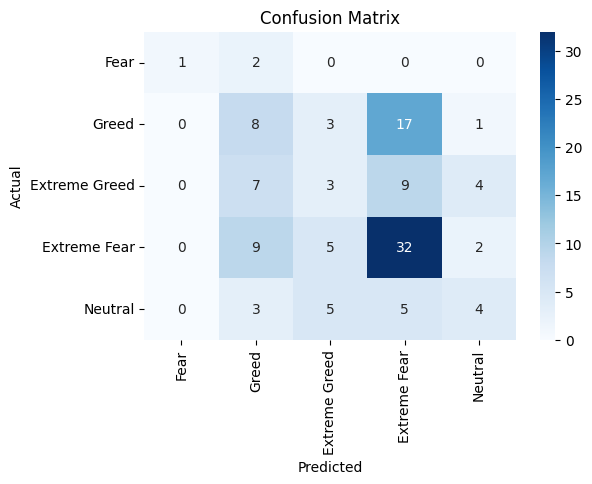

In [117]:
# EVALUATION
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Fear', 'Greed','Extreme Greed','Extreme Fear','Neutral']))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=['Fear','Greed','Extreme Greed','Extreme Fear','Neutral'],
            yticklabels=['Fear','Greed','Extreme Greed','Extreme Fear','Neutral'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


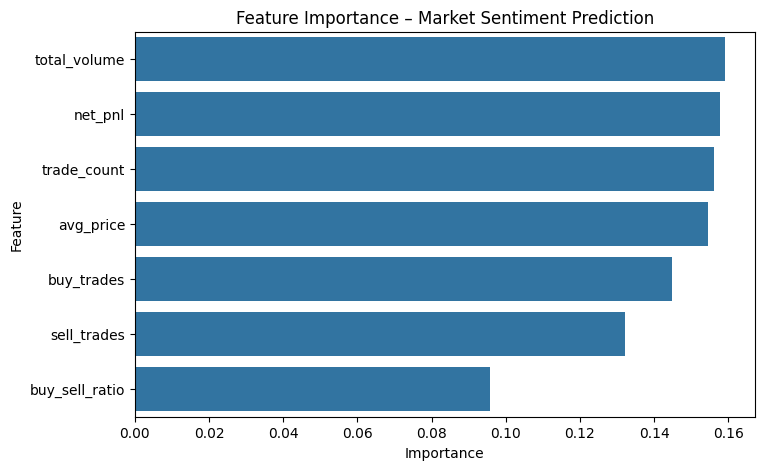

In [118]:
#  Model output
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance – Market Sentiment Prediction")
plt.show()

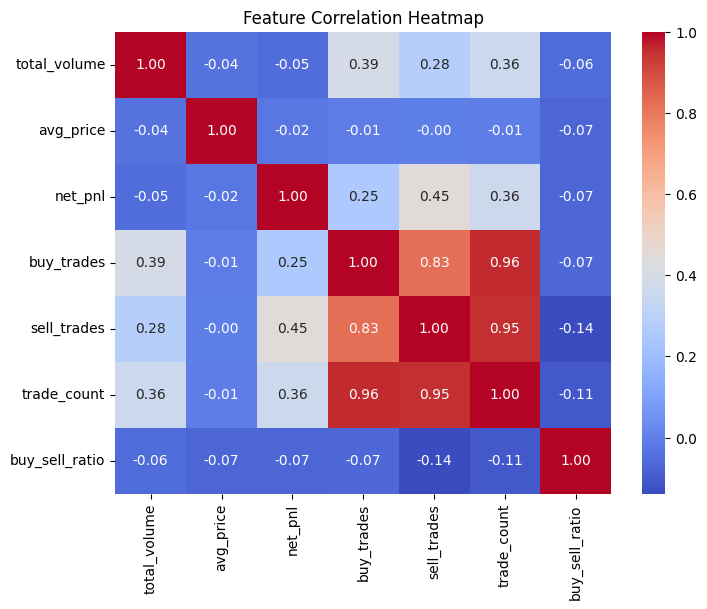

In [119]:
# corelation
features = [
'total_volume',
    'avg_price',
    'net_pnl',
    'buy_trades',
    'sell_trades',
    'trade_count',
    'buy_sell_ratio',
]

plt.figure(figsize=(8,6))
sns.heatmap(
    merged_df[features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Feature Correlation Heatmap")
plt.show()
